In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

In [57]:
dataset = pd.read_csv(r"D:\Maman\btcusd_1-min_data.csv")


In [58]:
dataset.shape

(7211196, 6)

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7211196 entries, 0 to 7211195
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 330.1 MB


In [60]:
dataset.describe()

,Timestamp,Open,High,Low,Close,Volume
count,7.211196e+06,7.211196e+06,7.211196e+06,7.211196e+06,7.211196e+06,7.211196e+06
mean,1.541750e+09,1.998435e+04,1.999165e+04,1.997683e+04,1.998435e+04,5.179555e+00
std,1.249059e+08,2.822901e+04,2.823680e+04,2.822109e+04,2.822901e+04,2.222088e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.433580e+09,4.364000e+02,4.366700e+02,4.361200e+02,4.364000e+02,1.858000e-02
50%,1.541748e+09,7.083100e+03,7.087780e+03,7.078885e+03,7.083210e+03,4.465304e-01
75%,1.649916e+09,2.961600e+04,2.962552e+04,2.960600e+04,2.961669e+04,2.935578e+00
max,1.758153e+09,1.244790e+05,1.245170e+05,1.243210e+05,1.244820e+05,5.853852e+03


In [61]:
dataset.select_dtypes(include= 'float64').columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [62]:
len(dataset.select_dtypes(include= 'float64').columns)

6

## dealing with missing null data

In [63]:
dataset.isnull().values.any()

np.False_

In [64]:
dataset.isnull().values.sum()

np.int64(0)

In [65]:
dataset.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [66]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [67]:
len(dataset.columns[dataset.isnull().any()])

0

<Axes: >

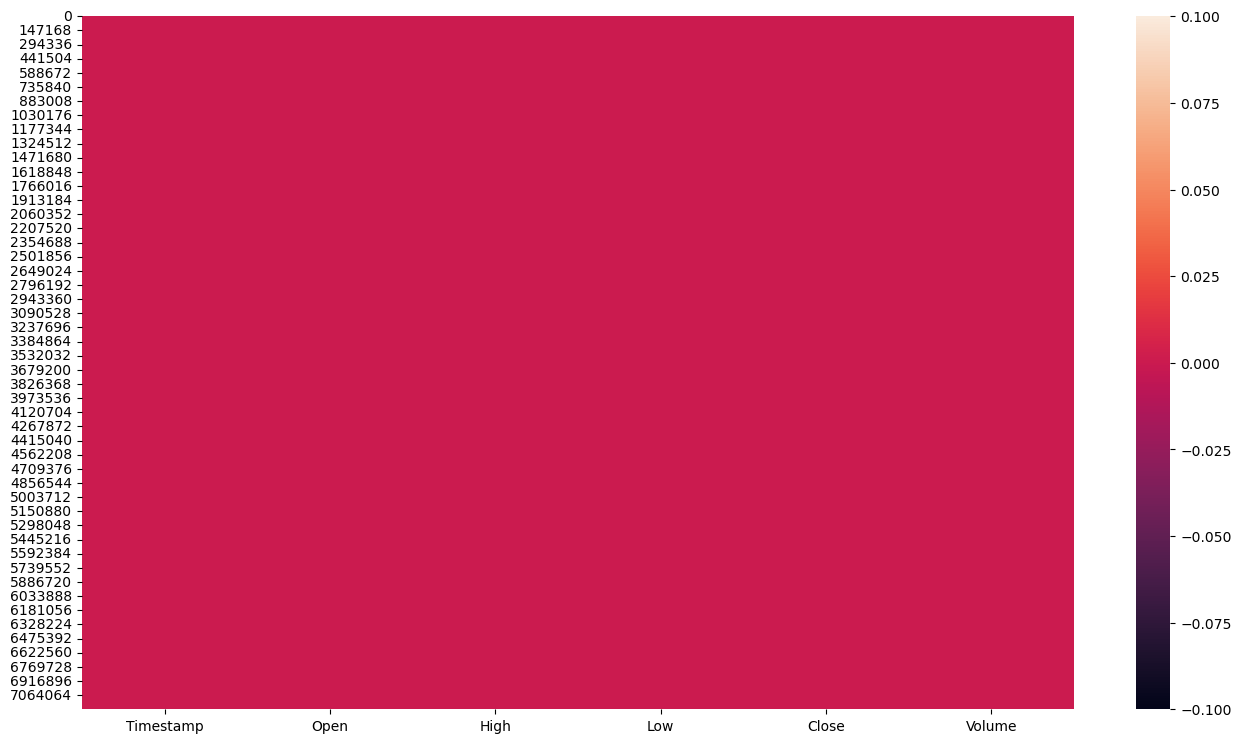

In [68]:
plt.figure(figsize=(16,9))
sns.heatmap(dataset.isnull())

In [69]:
dataset.shape

(7211196, 6)

In [70]:
null_percent = dataset.isnull().sum()/dataset.shape[0] *100

In [71]:
null_percent

Timestamp    0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Volume       0.0
dtype: float64

In [72]:
columns_to_drop = null_percent[ null_percent > 60].keys()

In [73]:
len(columns_to_drop)

0

In [ ]:
# dataset = dataset.drop(colums=['']) 

## add columns mean to numerical colum\


In [75]:
dataset['Timestamp']= dataset['Timestamp'].fillna( dataset['Timestamp'].mean())

## add colums means to categorical columns



In [76]:
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

In [77]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [78]:
len(dataset.columns[dataset.isnull().any()])

0

In [79]:
dataset['Timestamp']= dataset['Timestamp'].fillna( dataset['Timestamp'].mode())

displot


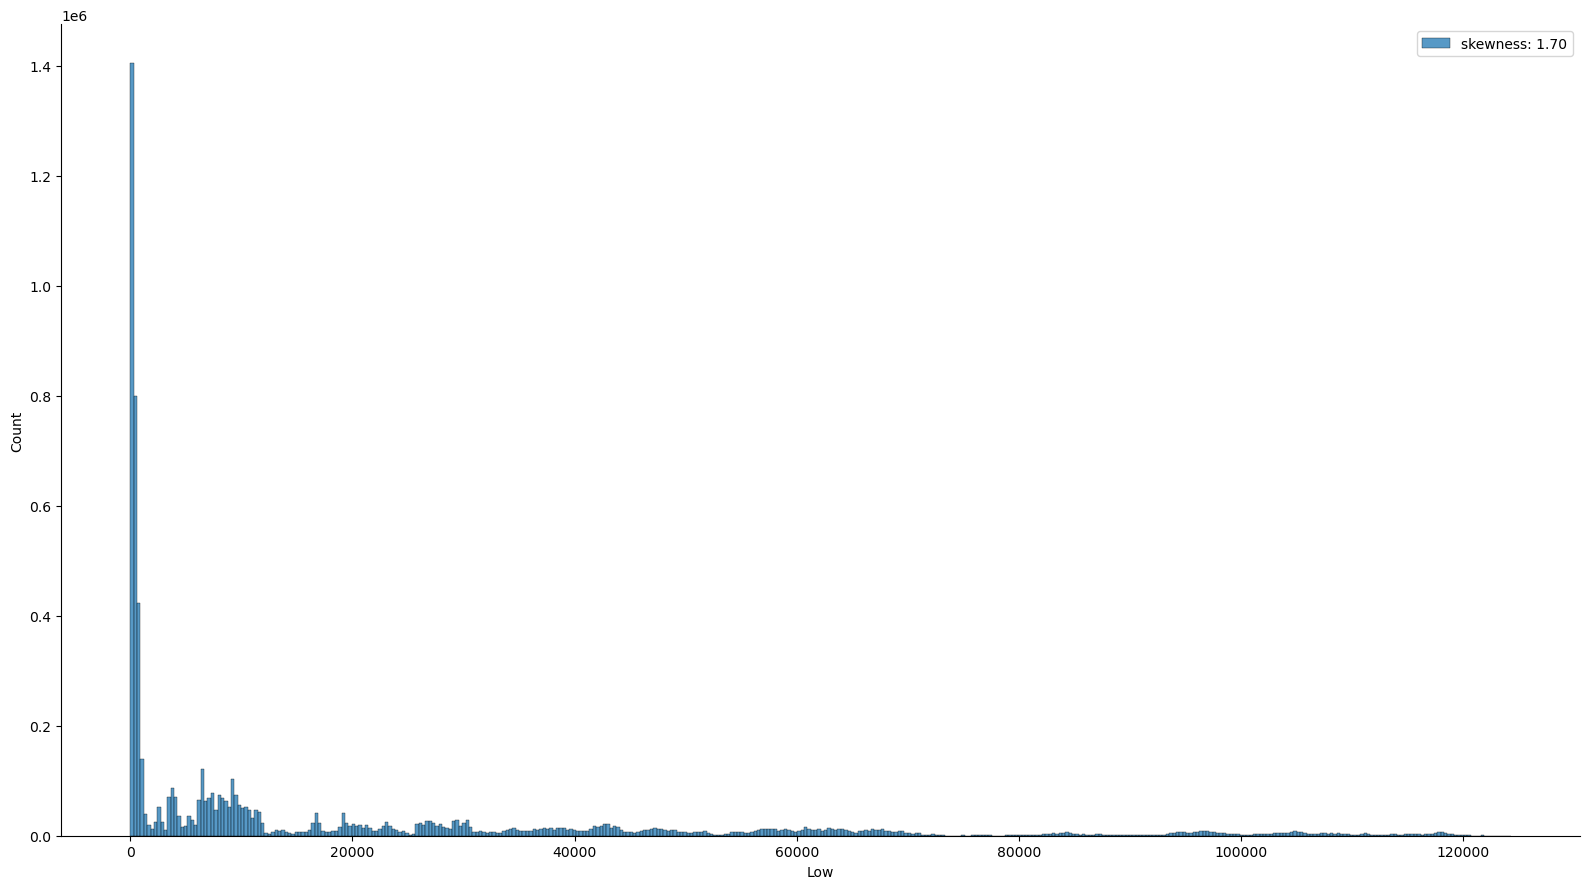

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

skewness = dataset['Low'].skew()

# Create displot
g = sns.displot(dataset["Low"], height=9, aspect=16/9)

# Add legend manually
g.ax.legend([f"skewness: {skewness:.2f}"])

plt.show()


TypeError: 'NoneType' object is not callable

<Figure size 1600x900 with 0 Axes>

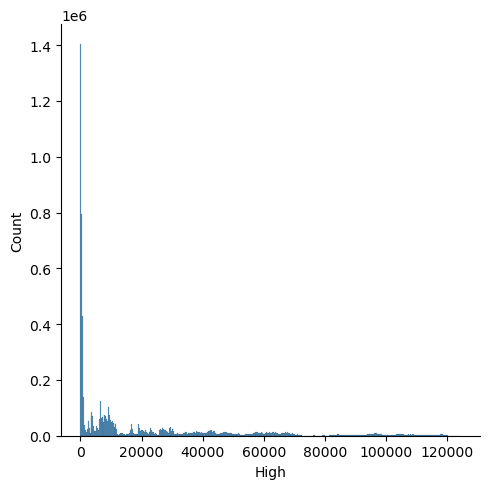

In [98]:
plt.figure(figsize=(16,9))
bar=sns.displot(dataset["High"])
skewness = dataset['High'].skew()
bar.legend([f"skewness: {skewness:.2f}"])
plt.show()

In [ ]:
nuric_df = dataset.select_dtypes(include=("float64"))
correlations = nuric_df.corrwith(dataset['High'])
correlations.plot.bar(figsize=(16,9), title='Correlated with High', grid=true)